In [11]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
!pwd

/content


# 이미지넷 압축파일 풀기

In [12]:
cd /content/MyDrive/MyDrive/project

/content/MyDrive/MyDrive/project


In [ ]:
!pwd

/content/MyDrive/MyDrive/project


In [ ]:
!ls -al

total 5328927
-rw------- 1 root root    1202546 Dec  9 00:06  1208.ipynb
-rw------- 1 root root    1621373 Dec  9 09:07  1209.ipynb
-rw------- 1 root root    1619121 Dec 11 09:36 '1209.ipynb의 사본'
-rw------- 1 root root   48879686 Dec  9 09:15  301-400구분.zip
-rw------- 1 root root      40701 Dec  8 22:21 'alexnet (1).ipynb'
-rw------- 1 root root     296594 Dec  8 07:33  AlexNet2.ipynb
-rw------- 1 root root      40701 Dec  8 05:45  alexnet.ipynb
-rw------- 1 root root     194650 Dec  8 07:20  ILSVRC2010_ground_truth.txt
-rw------- 1 root root 5397002240 Dec  5 09:46  ILSVRC2010_images_.tar
drwx------ 2 root root       4096 Dec  8 23:09  ImageNet
-rw------- 1 root root    2509433 Dec  8 22:21 'imagenet_이미지확인 (1).ipynb'
-rw------- 1 root root    2501721 Dec  8 09:40  imagenet_이미지확인.ipynb
-rw------- 1 root root     900877 Dec  8 22:21  lastproject.ipynb
drwx------ 2 root root       4096 Dec  9 00:25  val


In [ ]:
!wget /content/MyDrive/MyDrive/project/ILSVRC2010_images_.tar

/content/MyDrive/MyDrive/project/ILSVRC2010_images_.tar: Scheme missing.


In [ ]:
!tar -xzvf /content/MyDrive/MyDrive/project/ILSVRC2010_images_.tar



gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [ ]:
!pwd

/content/MyDrive/MyDrive/project


In [ ]:
import os
os.chdir('/content/MyDrive/MyDrive/project')

In [ ]:
!tar -xvf /content/MyDrive/MyDrive/project/ILSVRC2010_images_.tar

# 이미지넷 그림 확인하기

In [13]:
# 라이브러리 불러오기
import torch # ptyotch
import numpy as np # numpy
import matplotlib.pyplot as plt # matplotlib
import pandas as pd # pandas
import natsort
import cv2

In [14]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
import os
os.chdir('/content/MyDrive/MyDrive/project')

In [ ]:
# 결과변수 불러오기
y = pd.read_csv('ILSVRC2010_ground_truth.txt', header=None, names=['answer'])
y

,answer
0,78
1,854
2,435
3,541
4,973
...,...
49995,467
49996,646
49997,68
49998,93


In [ ]:
# 경로불러오기
image_path = '/content/MyDrive/MyDrive/project/val/'


In [10]:
file_path = os.listdir(image_path)

In [15]:
img_list = natsort.natsorted(file_path)

In [16]:
img_list_jpeg = [img for img in img_list if img.endswith(".JPEG")]

In [ ]:

print("img_list_jpeg: {}".format(img_list_jpeg))

img_list_jpeg: ['ILSVRC2010_val_00000001.JPEG', 'ILSVRC2010_val_00000002.JPEG', 'ILSVRC2010_val_00000003.JPEG', 'ILSVRC2010_val_00000004.JPEG', 'ILSVRC2010_val_00000005.JPEG', 'ILSVRC2010_val_00000006.JPEG', 'ILSVRC2010_val_00000007.JPEG', 'ILSVRC2010_val_00000008.JPEG', 'ILSVRC2010_val_00000009.JPEG', 'ILSVRC2010_val_00000010.JPEG', 'ILSVRC2010_val_00000011.JPEG', 'ILSVRC2010_val_00000012.JPEG', 'ILSVRC2010_val_00000013.JPEG', 'ILSVRC2010_val_00000014.JPEG', 'ILSVRC2010_val_00000015.JPEG', 'ILSVRC2010_val_00000016.JPEG', 'ILSVRC2010_val_00000017.JPEG', 'ILSVRC2010_val_00000018.JPEG', 'ILSVRC2010_val_00000019.JPEG', 'ILSVRC2010_val_00000020.JPEG', 'ILSVRC2010_val_00000021.JPEG', 'ILSVRC2010_val_00000022.JPEG', 'ILSVRC2010_val_00000023.JPEG', 'ILSVRC2010_val_00000024.JPEG', 'ILSVRC2010_val_00000025.JPEG', 'ILSVRC2010_val_00000026.JPEG', 'ILSVRC2010_val_00000027.JPEG', 'ILSVRC2010_val_00000028.JPEG', 'ILSVRC2010_val_00000029.JPEG', 'ILSVRC2010_val_00000030.JPEG', 'ILSVRC2010_val_00000031

# 클래스가 201인 데이터 불러오기
index = list(y[y['answer']==201].index)
img_list_open = [img_list_jpeg[i] for i in index]

In [ ]:
index = list(y[y['answer']==201].index)


In [ ]:
print(index)

[0, 1182, 1825, 2957, 4642, 4928, 6494, 7037, 7380, 7797, 7806, 8682, 8832, 9687, 10811, 13512, 14774, 16844, 16907, 17940, 19376, 22942, 23864, 24464, 28645, 30816, 31141, 32282, 33286, 34738, 36220, 36951, 37339, 38219, 38540, 41007, 43673, 44048, 44219, 44402, 44524, 44642, 44815, 45445, 48052, 48708, 48940, 49220, 49286, 49807]


In [ ]:
print(img_list_jpeg[1])

ILSVRC2010_val_00000002.JPEG


In [ ]:
print(len(index))

50


In [ ]:
img_list_open = [img_list_jpeg[i] for i in index]

In [ ]:
print('35')
index = list(y[y['answer']==35].index)
img_list_open = [img_list_jpeg[i] for i in index]

    # 이미지 그리기
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
  # 그림마다 픽셀의 눈금 없애기
ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')

for i in img_list_open:
    path = image_path + i

    img = cv2.imread(path)

    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(10, 5, img_list_open.index(i)+1)
    # (서브플롯 간 간격 조절)그림 사이의 공백 조절
    plt.subplots_adjust(left=3, bottom=2, right=5, top=3, wspace=0.05, hspace=0.3)
    plt.title([[i]])
    plt.imshow(img_color)

  plt.show()

In [ ]:
for x in range(381,401,1):
  print(x)
  index = list(y[y['answer']==x].index)
  img_list_open = [img_list_jpeg[i] for i in index]

    # 이미지 그리기
  plt.figure(figsize=(20, 20))
  fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
  # 그림마다 픽셀의 눈금 없애기
  ax[0][0].axis('off')
  ax[0][1].axis('off')
  ax[1][0].axis('off')
  ax[1][1].axis('off')

  for i in img_list_open:
    path = image_path + i

    img = cv2.imread(path)

    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(10, 5, img_list_open.index(i)+1)
    # (서브플롯 간 간격 조절)그림 사이의 공백 조절
    plt.subplots_adjust(left=3, bottom=2, right=5, top=3, wspace=0.05, hspace=0.3)
    plt.title([[i]])
    plt.imshow(img_color)

  plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
index = list(y[y['answer']==235].index)
img_list_open = [img_list_jpeg[i] for i in index]

In [ ]:
# 이미지 그리기
print('235')
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
# 그림마다 픽셀의 눈금 없애기
ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')

for i in img_list_open:
  path = image_path + i

  img = cv2.imread(path)

  img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(10, 5, img_list_open.index(i)+1)
  # (서브플롯 간 간격 조절)그림 사이의 공백 조절
  plt.subplots_adjust(left=3, bottom=2, right=5, top=3, wspace=0.05, hspace=0.3)
  plt.title([[i]])
  plt.imshow(img_color)

plt.show()


# VGG 모델 적용하기

# VGG모델(2014년) 적용 (Visual Geometry Group Net)
### 2014년 ILSVRC에서 2등 차지 
### 특징
활성화 함수로 ReLU 사용, Dropout 적용
합성곱과 폴링 계층으로 구성된 블록과 분류를 위한 완전 연결계층으로 결합된 전형적인 구조
이미지 변환, 좌우 반전 등의 변환을 시도하여 인위적으로 데이터셋을 늘림
몇 개의 합성곱 계층과 최대 풀링 계층이 따르는 5개의 블로과 3개의 완전 계층 (학습시 드롭아웃으로 사용)
모든 합성곱과 최대 폴링계층에 padding='SAME"적용
합성곱 계층에는 stride=1, 활성화 함수로 ReLU 사용
특징 맵 깊이를 증가시킴
척도 변경을 통한 데이터 보강(Data Augmentation)

### 기여
3X3커널을 갖는 두 합성곱 계층을 쌓은 스택으 5X5커널을 갖는 하나의 합성곱 계층과 동일한 수용영역(ERF)을 가짐
11 X 11 사이즈의 필터를 가지는 AlexNet과 비교하여 더 작은 합성곱을 더 많이 포함해 더 큰 ERF를 얻음
합성곱 계층의 개수가 많아지면 매개 변수 개수를 줄이고 비선형성을 증가시킴

### VGG-16모델 (16개층)
### VGG-19모델 (19개층)

ImageNEt에서훈련이 끝난 후 얻게 된 매개변수 값 로딩
네트워크를 다시 처음부터 학습하고자 한다면 weight=None으로 설정, 케라스에서 무작위로 가중치를 설정함
Include_top=False : VGG의 밀집 계층을 제외한다는 뜻
해당 네트워크의 출력은 합성곱 최대-폴링 블록의 특징맵이 됨
pooling : 특징맵을 반환하기 전에 적용ㄹ할 선택적인 연산을 지정






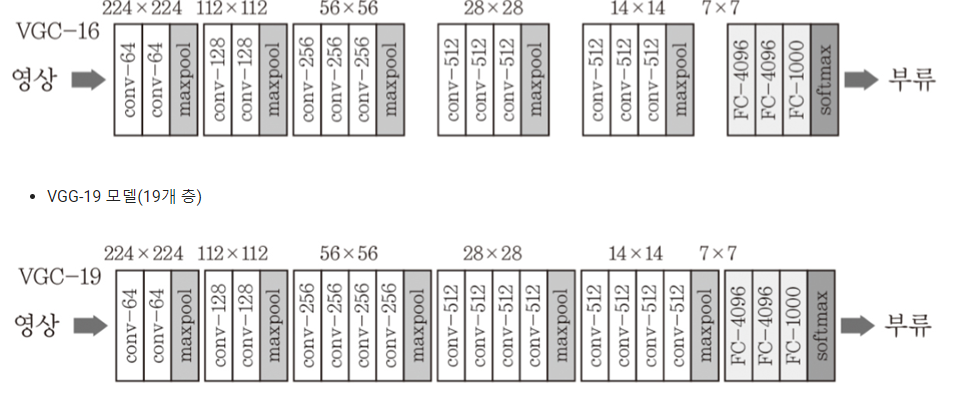

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

vggnet = VGG19(include_top = True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None, classes=1000)

vggnet.summary()

* dog.jpg (https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg)

In [ ]:
!wget -O dog.jpg  https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg

In [22]:
from keras.applications.vgg16 import VGG16
import keras.utils as image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 1s 863ms/step


In [ ]:
print(features)

In [25]:
from keras.applications.vgg19 import VGG19
import keras.utils as image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

1/1 [==============================] - 1s 635ms/step


In [ ]:
print(block4_pool_features)

In [ ]:
img = image.load_img('dog.jpg', target_size=(224,224))
plt.imshow(img)
x = image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = vggnet.predict(x)
print(decode_predictions(preds))

# Keras를 이용한 CNN 으로 이미지 분류

## 1. 데이터 탐색

In [30]:
import tensorflow as tf
from tensorflow import keras
import keras.utils
import keras.layers
import keras.datasets
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [60]:
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tfd


In [ ]:
data_train, ds_info = tfds.load('cifar10',split=[tfds.Split.TRAIN], with_info=True)

In [61]:
import pandas as pd
import os
from tensorflow.keras.datasets import cifar10

(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


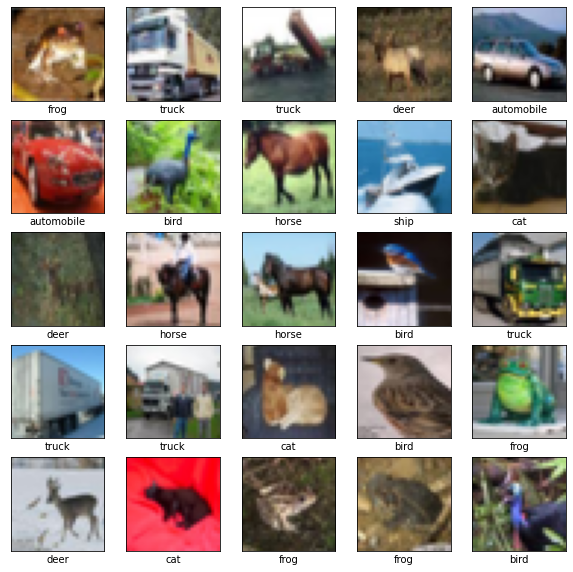

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5290 - accuracy: 0.4395
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1731 - accuracy: 0.5834
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0196 - accuracy: 0.6426
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9146 - accuracy: 0.6789
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8424 - accuracy: 0.7041
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7804 - accuracy: 0.7270
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7275 - accuracy: 0.7437
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6851 - accuracy: 0.7606
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6438 - accuracy: 0.7730
Epoch 10/10
313/313 [==============================] - 5s 15ms/s

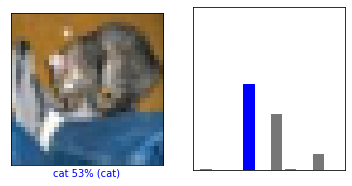

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
 
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)
 
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
 
 
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
 
 
train_images = train_images/255.0
test_images = test_images/255.0
 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
model.fit(train_images, train_labels, epochs=10)
 
test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)
 
predictions = model.predict(test_images)
 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
 
  plt.imshow(img, cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')
 
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()
 


In [37]:
from tensorflow.keras import utils

In [33]:
print(tf.__version__)
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

2.9.2
170498071/170498071 [==============================] - 2s 0us/step


In [42]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
class_names = [
    'Airplane',
    'Car',
    'Birs',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck'
]

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)

plt.show()

In [41]:
batch_size = 64
num_classes = 10
epochs = 35

train_images = train_images.astype('float32')
train_images = train_images / 255

test_images = test_images.astype('float32')
test_images = test_images / 255

train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

## 2. CNN 모델 구성

In [ ]:
model = keras.Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=train_images.shape[1:],activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(num_classes, activation=tf.nn.softmax)
])

model.summary()

In [57]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## 3. 모델 훈련
### 생성된 모델을 훈련시킵니다.

In [58]:
# 과대적합을 막기위해서 설정

early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [51]:
print(early_stopping)

In [ ]:
 model.fit(
    train_images, train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    shuffle=True,
    callbacks=[early_stopping]
)

## 1. 데이터 탐색